In [ ]:
from sklearn.datasets import fetch_openml   #mnist data download
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

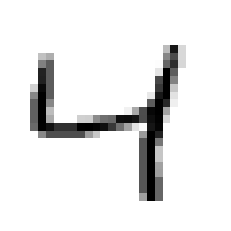

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]   #sample data
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
y[2]    #sample lable of data(string)

'4'

In [ ]:
import numpy as np

y = y.astype(np.uint8)  #string to unsigned int

In [ ]:
y[2]    #sample lable of data(int)

4

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])   #predict

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score     #교차검증 평가점수
cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.9671 , 0.97645, 0.9687 ])

In [ ]:
from sklearn.model_selection import cross_val_predict   #교차검증 예측값

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix   #오차행렬
confusion_matrix(y_train_4, y_train_pred)
#[[TN, FP],
#[FN, TP]]

array([[52957,  1201],
       [  554,  5288]])

In [ ]:
y_train_perfect_predictions = y_train_4     #완벽한 분류기
confusion_matrix(y_train_4, y_train_perfect_predictions)

array([[54158,     0],
       [    0,  5842]])

In [ ]:
from sklearn.metrics import precision_score, recall_score   #정밀도와 재현율
precision_score(y_train_4, y_train_pred)    #정밀도

0.8149175527816305

In [ ]:
recall_score(y_train_4, y_train_pred)   #재현율

0.905169462512838

In [ ]:
from sklearn.metrics import f1_score    #f1 점수

f1_score(y_train_4, y_train_pred)

0.8576757764982564

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])  #각 샘플의 점수
y_scores

array([3214.66574913])

In [ ]:
threshold = 0   #임계값 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000    #임계값 8000 임계값을 높이면 재현율이 줄어들음
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3,     #모든 샘플의 점수
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve  #모든 임곗값에 대한 정밀도와 재현율 계산

precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

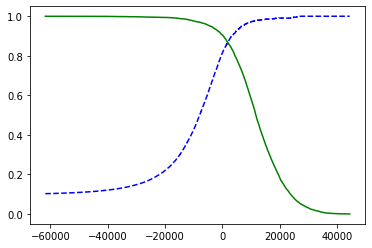

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):    #정밀도와 재현율 그래프def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):    #정밀도와 재현율 그래프
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]  #정밀도 90목표

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision) 

In [ ]:
precision_score(y_train_4, y_train_pred_90)

0.9001287474710318

In [ ]:
recall_score(y_train_4, y_train_pred_90)

0.8377268058883944

In [ ]:
from sklearn.metrics import roc_curve   #ROC: 거짓양성비율(FPR)에 대한 진짜양성비율(TNR)의 곡선

fpr, tpr, thresholds = roc_curve(y_train_4, y_scores)

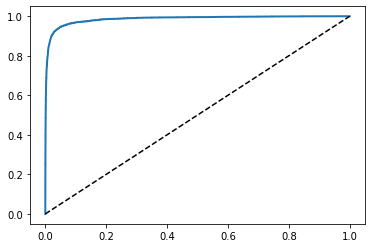

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr, label=None)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score   #곡선 아래의 면적(AUC)

roc_auc_score(y_train_4, y_scores)

0.9859276923382874

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_4, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] #양성 클래스에 대한 확률을 점수로 사용.
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_4,y_scores_forest)

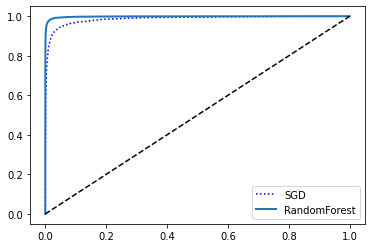

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")
plt.legend(loc="lower right")
plt.show()    #RandomForestClassifier의 ROC곡선이 왼쪽 위 모서리에 더 가까워 SGDClassifier보다 더 좋다

In [ ]:
roc_auc_score(y_train_4, y_scores_forest)   #99프로의 정밀도

0.9982278527638186

In [ ]:
from sklearn.svm import SVC     #SVC: 다중분류기, 0~9까지 분류한다.
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([4], dtype=uint8)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])     #가장 높은 점수가 클래스 4에 해당된다.
some_digit_scores

array([[ 0.71537935, -0.29662415,  5.21971626,  6.21824425,  9.30389385,
         3.80284658,  1.79830476,  7.24440738,  2.74262663,  8.25740666]])

In [ ]:
np.argmax(some_digit_scores)    #인덱스 4에 해당되는 클래스의 값은 4

4

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier  #SVC기반 OVR전략을 사용하는 다중 분류기
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([4], dtype=uint8)

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4], dtype=uint8)

In [85]:
sgd_clf.decision_function([some_digit])  #decision_function method는 클래스마다 하느이 값을 반환

array([[-34143.40703505, -21942.13780869,  -4018.29275037,
         -2239.19313075,     43.09419826, -15058.88052383,
        -33653.31059893,  -8277.80610963,  -7460.52016321,
        -14180.15338984]])

In [86]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")    #cross_val_score로 SGDClassifier의 정확도 평가

array([0.87365, 0.85835, 0.8689 ])

In [88]:
from sklearn.preprocessing import StandardScaler    #입력 스케일 조정
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [89]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)    #cross_val_predict함수를 이용해 예측
conf_mx = confusion_matrix(y_train, y_train_pred)   #confusion_matrix로 오차행렬 생성
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

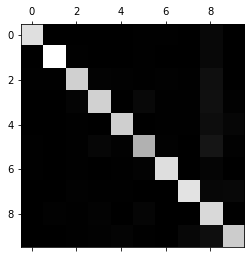

In [90]:
plt.matshow(conf_mx, cmap=plt.cm.gray)  #matshow함수를 사용해 이미지로 표현
plt.show()

In [91]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

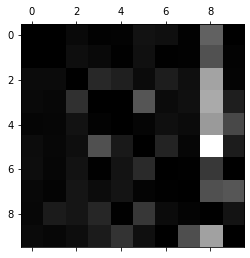

In [92]:
np.fill_diagonal(norm_conf_mx, 0)   #다른 항목은 그대로 유지하고 주대각선만 0으로 채워서 그래프그리기
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [104]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)  #이미지 경로저장
os.makedirs(IMAGES_PATH, exist_ok=True)

In [99]:
def plot_digits(instances, images_per_row=10, **options):   #이미지 show 함수
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [100]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):   #이미지 저장함수
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure error_analysis_digits_plot


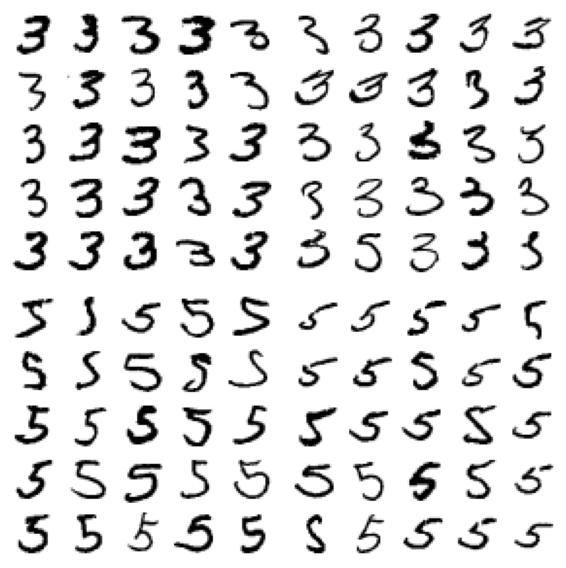

In [105]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()  #3,5로 분루된 5*5 이미지